Звіт класифікації SVM з ядром 'linear':
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      6315
         1.0       0.85      0.93      0.89      8064

    accuracy                           0.87     14379
   macro avg       0.87      0.86      0.87     14379
weighted avg       0.87      0.87      0.87     14379

Точність (Accuracy): 0.87
Відчутність (Recall): 0.93
Точність (Precision): 0.85
F1 міра: 0.89

Звіт класифікації SVM з ядром 'rbf':
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      6315
         1.0       0.91      0.93      0.92      8064

    accuracy                           0.91     14379
   macro avg       0.91      0.90      0.91     14379
weighted avg       0.91      0.91      0.91     14379

Точність (Accuracy): 0.91
Відчутність (Recall): 0.93
Точність (Precision): 0.91
F1 міра: 0.92

Звіт класифікації SVM з ядром 'poly':
              precision    recall  f1-sco

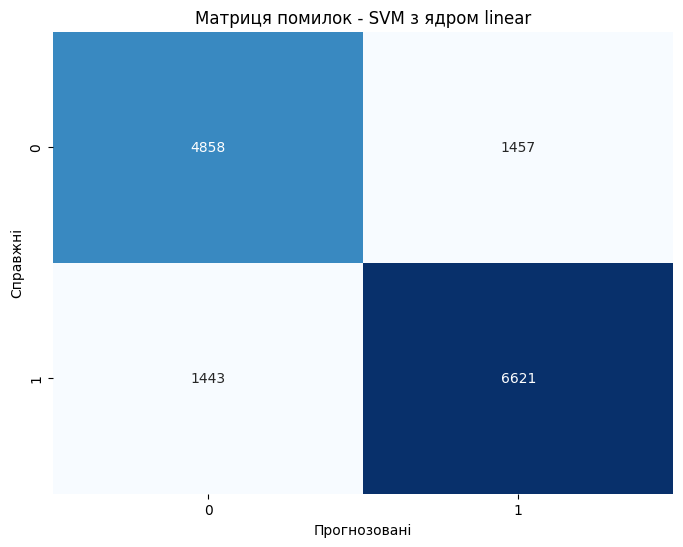

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib  # Для збереження моделі

# Завантаження даних
data = pd.read_csv('../data/internet_service_churn_updated.csv')

# Визначення озброєння та цільової змінної
X = data.drop('churn', axis=1)
y = data['churn']

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Навчання моделі SVM з різними ядрами
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_reports = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_test_scaled)
    
    # Розрахунок метрик
    accuracy = accuracy_score(y_test, svm_predictions)
    recall = recall_score(y_test, svm_predictions)
    precision = precision_score(y_test, svm_predictions)
    f1 = f1_score(y_test, svm_predictions)
    
    svm_reports[kernel] = {
        'report': classification_report(y_test, svm_predictions, output_dict=True),
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1-score': f1
    }
    
    print(f"Звіт класифікації SVM з ядром '{kernel}':")
    print(classification_report(y_test, svm_predictions))
    print(f"Точність (Accuracy): {accuracy:.2f}")
    print(f"Відчутність (Recall): {recall:.2f}")
    print(f"Точність (Precision): {precision:.2f}")
    print(f"F1 міра: {f1:.2f}")
    print()

# Вибір лінійного ядра для демонстрації графіків
selected_kernel = 'linear'
svm_classification_report = svm_reports[selected_kernel]

# Збереження моделі SVM
model_filename = '../models/svm_model_linear.pkl'
joblib.dump(svm_model, model_filename)
print(f'Модель SVM з ядром "linear" збережена у {model_filename}')

# Завантаження моделі SVM для перевірки
loaded_svm_model = joblib.load(model_filename)
print('Модель SVM завантажена успішно')

# Прогнозування з використанням завантаженої моделі
loaded_predictions = loaded_svm_model.predict(X_test_scaled)
print(classification_report(y_test, loaded_predictions))

# Графік матриці помилок
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Прогнозовані')
    plt.ylabel('Справжні')
    plt.show()

plot_confusion_matrix(y_test, loaded_svm_model.predict(X_test_scaled), classes=['0', '1'], title=f'Матриця помилок - SVM з ядром {selected_kernel}')